# Datenanalyse der Seattle Public Library

Das Projekt *Datenanalyse der Seattle Public Libray* verfolgt den Zweck, die Ausleih- und Inventardaten der Seattle Public Library hinsichtlich verschiedener Aspekte zu analysieren und unter Zuhilfenahme von Visualisierungstools sinnvolle Aussagen treffen zu können. Hierzu werden Daten der letzten fünf Jahre miteinander verglichen.

In [1]:
import urllib.request
import pandas as pd

In [2]:
# Definieren der Ausdrücke

url1 = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2020&$limit=10000000"
url2 = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000000"
url3 = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000000"
url4 = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2017&$limit=10000000"
url5 = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2016&$limit=10000000"

checkout_file1 = "checkouts_2020.csv"
checkout_file2 = "checkouts_2019.csv"
checkout_file3 = "checkouts_2018.csv"
checkout_file4 = "checkouts_2017.csv"
checkout_file5 = "checkouts_2016.csv"

In [3]:
# Beziehen der Dateien
urllib.request.urlretrieve (url1, checkout_file1)
urllib.request.urlretrieve (url2, checkout_file2)
urllib.request.urlretrieve (url3, checkout_file3)
urllib.request.urlretrieve (url4, checkout_file4)
urllib.request.urlretrieve (url5, checkout_file5)

('checkouts_2016.csv', <http.client.HTTPMessage at 0x237d2e491c8>)

In [4]:
# Erstellung des Dataframe
checkouts2020 = pd.read_csv (checkout_file1)
checkouts2019 = pd.read_csv (checkout_file2)
checkouts2018 = pd.read_csv (checkout_file3)
checkouts2017 = pd.read_csv (checkout_file4)
checkouts2016 = pd.read_csv (checkout_file5)

## Gibt es Monate, in denen mehr Bücher ausgeliehen werden, als in anderen?

Mit den Daten für die Jahre 2016 bis 2020 möchte ich herausfinden, in welchem Monat es wie viele Ausleihen gab und ob unter Umständen jahreszeitliche Schwankungen vorliegen.

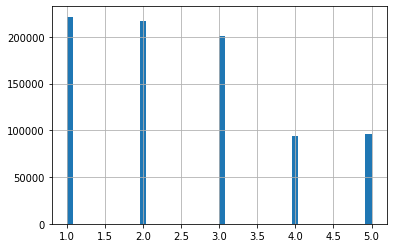

In [5]:
checkouts2020 ["checkoutmonth"].hist(bins = 50)

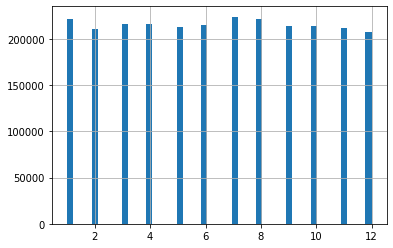

In [6]:
checkouts2019 ["checkoutmonth"].hist(bins = 50)

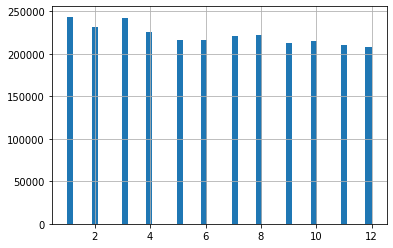

In [7]:
checkouts2018 ["checkoutmonth"].hist(bins = 50)

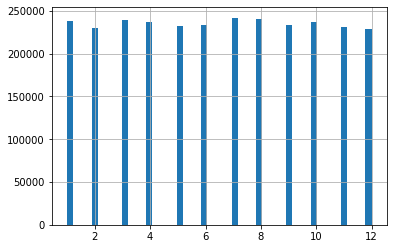

In [8]:
checkouts2017 ["checkoutmonth"].hist(bins = 50)

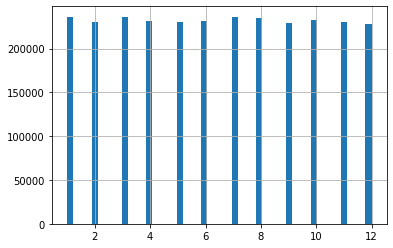

In [9]:
checkouts2016 ["checkoutmonth"].hist(bins = 50)

### Ergebnis Ausleihzahlen
Für die Jahre 2016 bis 2019 sind die Ausleihzahlen relativ gleichmäßig auf alle Monate verteilt. Jahreszeitliche Schwankungen sind dabei nicht festzutellen. 2020 gibt es ab April einen deutlichen Einbruch in den Ausleihzahlen, was vermutlich in direktem Zusammenhang mit der Schließung der Filialen der Seattle Public Library im Zuge der CoViD-19-Pandemie steht. Da für das Jahr 2020 lediglich die Monate Januar bis Mai zur Verfügung stehen, werden für die nächsten Untersuchungen ebenfalls nur diese Monate angesetzt.

In [10]:
# Einschränkung auf die Monate Januar bis Mai

checkouts2019_JanMay = checkouts2019[checkouts2019 ["checkoutmonth"] <=5]
checkouts2018_JanMay = checkouts2018[checkouts2018 ["checkoutmonth"] <=5]
checkouts2017_JanMay = checkouts2017[checkouts2017 ["checkoutmonth"] <=5]
checkouts2016_JanMay = checkouts2016[checkouts2016 ["checkoutmonth"] <=5]

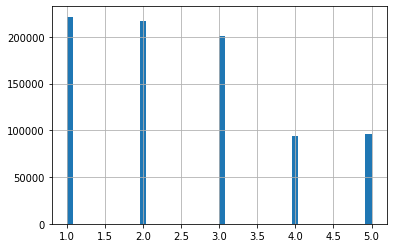

In [11]:
checkouts2020 ["checkoutmonth"].hist(bins = 50)

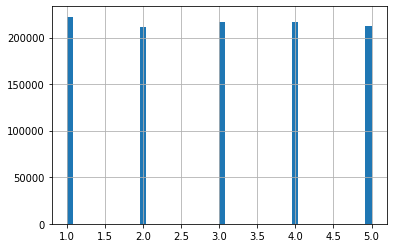

In [12]:
checkouts2019_JanMay ["checkoutmonth"].hist(bins = 50)

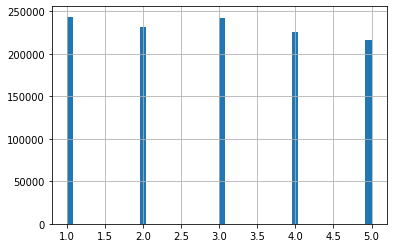

In [13]:
checkouts2018_JanMay ["checkoutmonth"].hist(bins = 50)

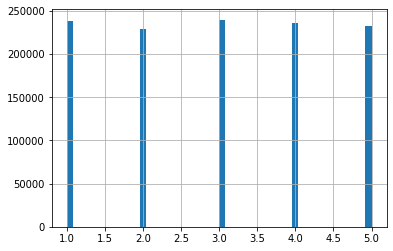

In [14]:
checkouts2017_JanMay ["checkoutmonth"].hist(bins = 50)

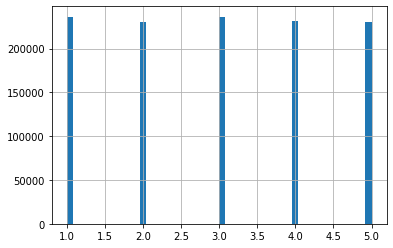

In [15]:
checkouts2016_JanMay ["checkoutmonth"].hist(bins = 50)

## Was wurde in einem Monat am häufigsten ausgeliehen?

Die nachfolgende Untersuchung versucht herauszufinden, welches Objekt in der Seattle Public Library am häufigsten ausgeliehen wird.

In [16]:
checkouts2020.checkouts.max()

1894

In [17]:
checkouts2019.checkouts.max()

1684

In [18]:
checkouts2018.checkouts.max()

2073

In [19]:
checkouts2017.checkouts.max()

988

In [20]:
checkouts2016.checkouts.max()

668

In [21]:
maxcheckouts_2020 = checkouts2020 [checkouts2020 ["checkouts"] >=1894]
maxcheckouts_2019 = checkouts2019 [checkouts2019 ["checkouts"] >=1684]
maxcheckouts_2018 = checkouts2018 [checkouts2018 ["checkouts"] >=2073]
maxcheckouts_2017 = checkouts2017 [checkouts2017 ["checkouts"] >=988]
maxcheckouts_2016 = checkouts2016 [checkouts2016 ["checkouts"] >=668]

In [22]:
maxcheckouts_16_20 = pd.concat ([maxcheckouts_2020, maxcheckouts_2019, maxcheckouts_2018, maxcheckouts_2017, maxcheckouts_2016])

In [23]:
maxcheckouts_16_20

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
142519,Digital,OverDrive,AUDIOBOOK,2020,4,1894,Harry Potter and the Sorcerer's Stone: Harry P...,J. K. Rowling,"Juvenile Fiction, Juvenile Literature",Pottermore,2012
512327,Physical,Horizon,MIXED,2019,10,1684,FlexTech--Laptops.,NaN,"Laptop computers, iPad Computer, Tablet computers","Lenovo,",[2013-].
595117,Physical,Horizon,MIXED,2018,10,2073,FlexTech--Laptops.,NaN,"Laptop computers, iPad Computer, Tablet computers","Lenovo,",[2013-].
208458,Physical,Horizon,MIXED,2017,12,988,In Building Device Checkout,NaN,"Laptop computers, iPad Computer, Tablet computers","Lenovo,",[2013-].
1185634,Physical,Horizon,MIXED,2016,3,668,SPL HotSpot : connecting Seattle / [distribute...,NaN,"Wireless LANs, Wireless Internet, Wireless com...","Verizon Wireless,",©2014.


### Ergebnis Häufigste Ausleihe
Mit Ausnahme des Jahres 2020 wurden im untersuchten Zeitraum nicht Medien am häufigsten entliehen, sondern andere Angebote der Seattle Public Library. In den Jahren 2017-2019 waren es Laptops oder andere mobile Endgeräte, 2016 war es Internetzugang.